In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)


In [3]:
df = pd.read_csv("emi_prediction_dataset.csv")
df.head()



FileNotFoundError: [Errno 2] No such file or directory: 'emi_prediction_dataset.csv'

In [ ]:
df.shape
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

,count,mean,std,min,25%,50%,75%,max
years_of_employment,404800.0,5.364079,6.079135,0.5,1.2,3.2,7.2,36.0
monthly_rent,402374.0,5828.446490,8648.604639,0.0,0.0,0.0,10600.0,80000.0
family_size,404800.0,2.940425,1.075199,1.0,2.0,3.0,4.0,5.0
dependents,404800.0,1.940425,1.075199,0.0,1.0,2.0,3.0,4.0
school_fees,404800.0,4624.575593,5061.074401,0.0,0.0,3000.0,9000.0,15000.0
college_fees,404800.0,4066.253706,7319.344289,0.0,0.0,0.0,6500.0,25000.0
travel_expenses,404800.0,5687.497777,3392.671132,600.0,3200.0,4900.0,7400.0,30300.0
groceries_utilities,404800.0,12804.999506,6993.853745,1800.0,7700.0,11400.0,16400.0,71200.0
other_monthly_expenses,404800.0,7119.309783,4510.447300,600.0,3800.0,6000.0,9300.0,42900.0
current_emi_amount,404800.0,4543.407609,7034.901139,0.0,0.0,0.0,8000.0,56300.0


<Axes: >

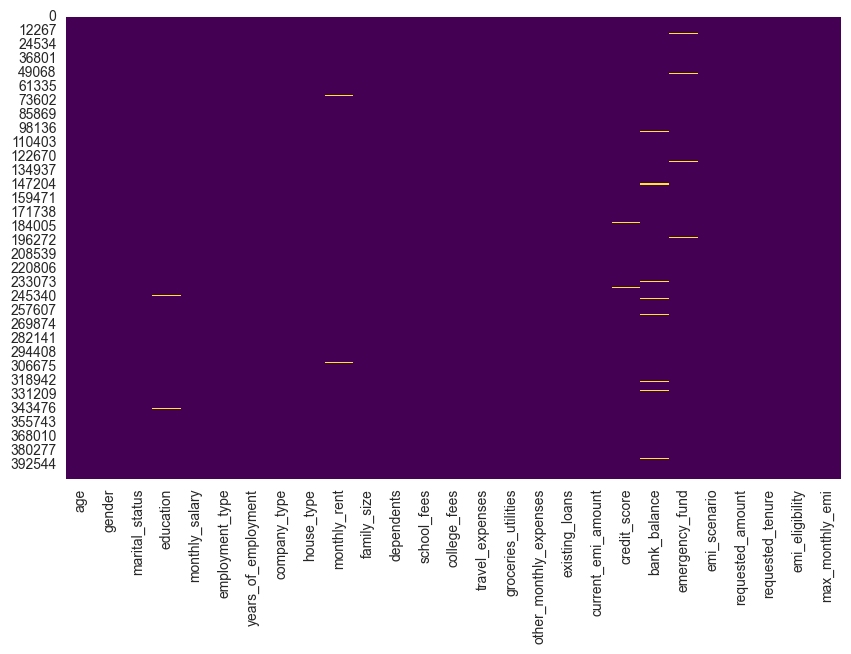

In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df[["monthly_salary", "current_emi_amount", "monthly_rent"]].dtypes


monthly_salary         object
current_emi_amount    float64
monthly_rent          float64
dtype: object

In [ ]:
df["monthly_salary"] = pd.to_numeric(df["monthly_salary"], errors="coerce")


In [ ]:
df["monthly_salary"].dtype


dtype('float64')

In [ ]:
df[df["monthly_salary"] < df["current_emi_amount"]].shape
df[df["monthly_rent"] > df["monthly_salary"]].shape
df[(df["credit_score"] < 300) | (df["credit_score"] > 850)].shape


(4776, 27)

C:\Users\CTG\AppData\Local\Temp\ipykernel_4428\4193391956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="emi_eligibility", palette="Set2")


<Axes: xlabel='emi_eligibility', ylabel='count'>

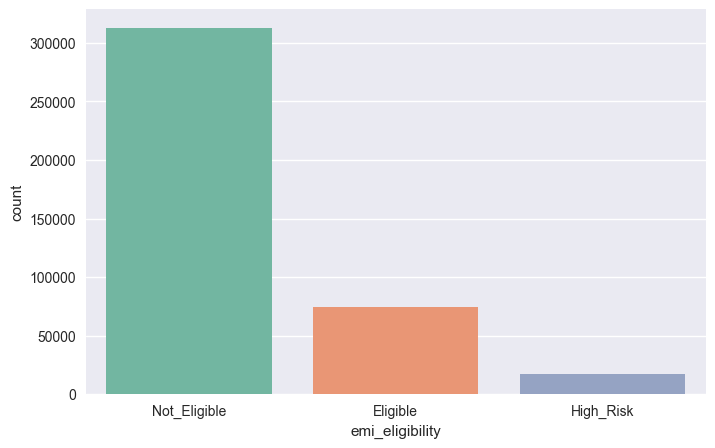

In [ ]:
df["emi_eligibility"].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="emi_eligibility", palette="Set2")

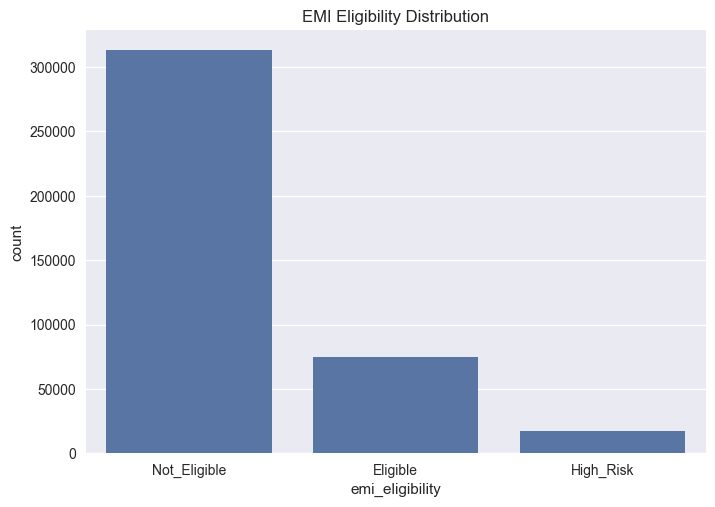

In [ ]:
sns.countplot(x="emi_eligibility", data=df)
plt.title("EMI Eligibility Distribution")
plt.show()


In [ ]:
df["max_monthly_emi"].describe()


count    404800.000000
mean       6763.602156
std        7741.263317
min         500.000000
25%         500.000000
50%        4211.200000
75%        9792.000000
max       91040.400000
Name: max_monthly_emi, dtype: float64

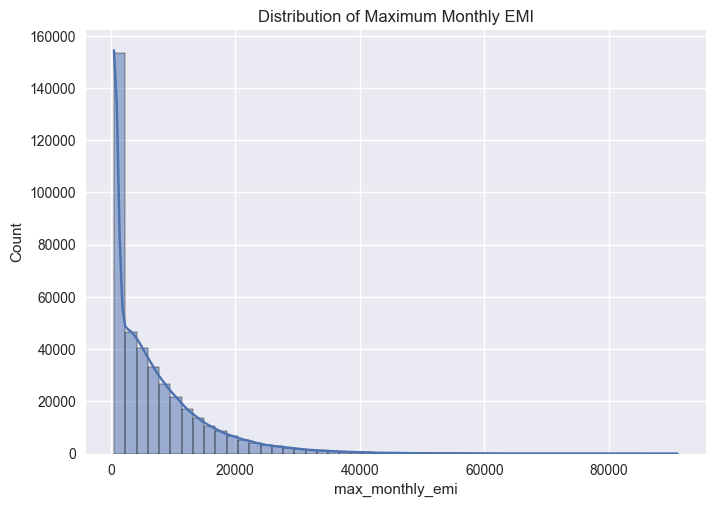

In [ ]:
sns.histplot(df["max_monthly_emi"], bins=50, kde=True)
plt.title("Distribution of Maximum Monthly EMI")
plt.show()


In [ ]:
df["emi_scenario"].value_counts()


emi_scenario
Home Appliances EMI        80988
Personal Loan EMI          80980
E-commerce Shopping EMI    80948
Education EMI              80942
Vehicle EMI                80942
Name: count, dtype: int64

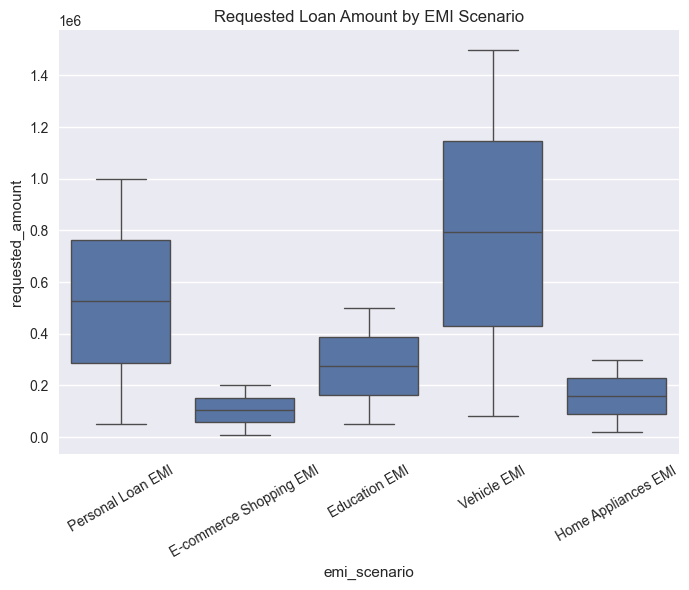

In [ ]:
sns.boxplot(
    x="emi_scenario",
    y="requested_amount",
    data=df
)
plt.xticks(rotation=30)
plt.title("Requested Loan Amount by EMI Scenario")
plt.show()


In [ ]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")


In [ ]:
df["age"].dtype


dtype('float64')

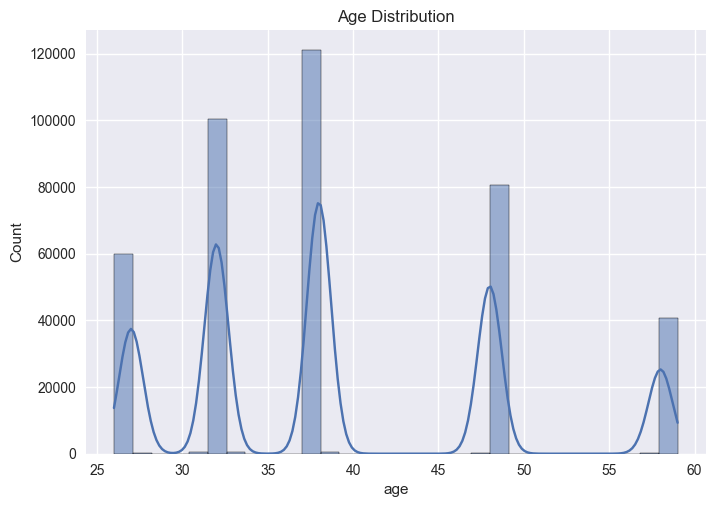

In [ ]:
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


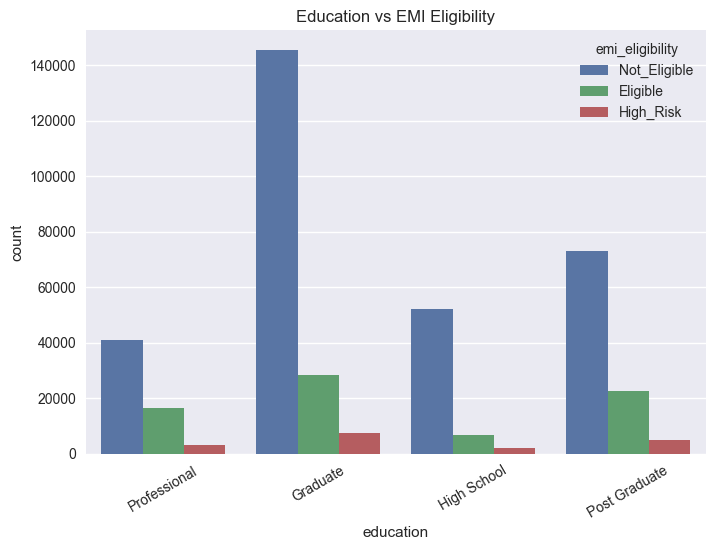

In [ ]:
sns.countplot(
    x="education",
    hue="emi_eligibility",
    data=df
)
plt.xticks(rotation=30)
plt.title("Education vs EMI Eligibility")
plt.show()


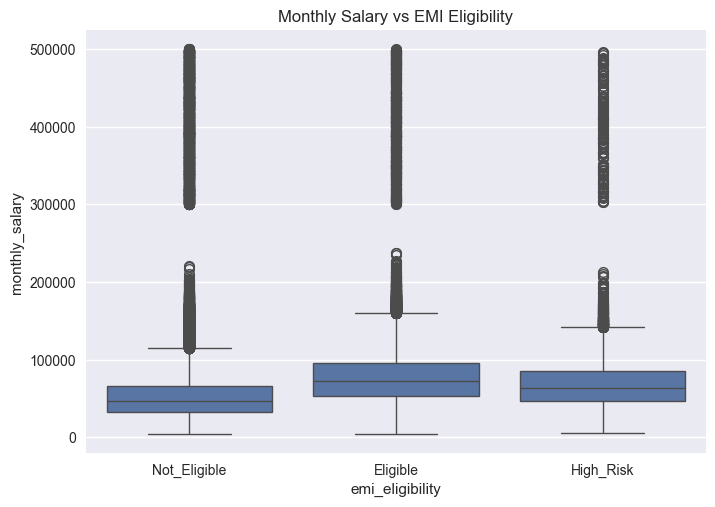

In [ ]:
sns.boxplot(
    x="emi_eligibility",
    y="monthly_salary",
    data=df
)
plt.title("Monthly Salary vs EMI Eligibility")
plt.show()


In [ ]:
expense_cols = [
    "school_fees",
    "college_fees",
    "travel_expenses",
    "groceries_utilities",
    "other_monthly_expenses"
]

df[expense_cols].corr()


,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses
school_fees,1.000000,0.054541,0.000548,-0.000166,0.000370
college_fees,0.054541,1.000000,-0.001914,-0.002538,-0.000303
travel_expenses,0.000548,-0.001914,1.000000,0.772067,0.666282
groceries_utilities,-0.000166,-0.002538,0.772067,1.000000,0.726931
other_monthly_expenses,0.000370,-0.000303,0.666282,0.726931,1.000000


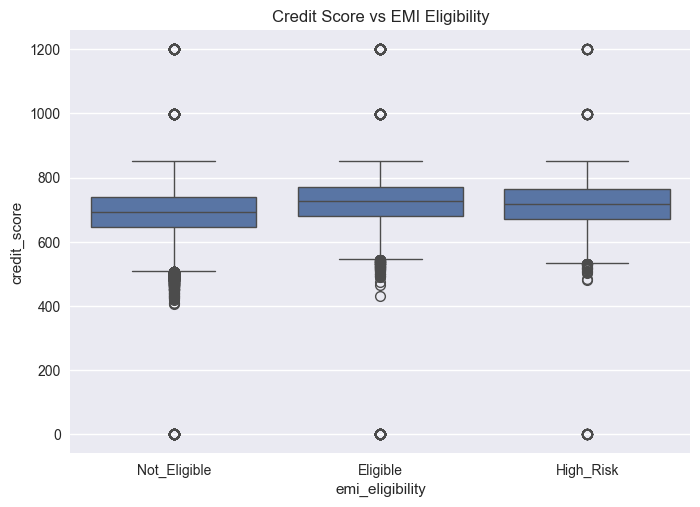

In [ ]:
sns.boxplot(
    x="emi_eligibility",
    y="credit_score",
    data=df
)
plt.title("Credit Score vs EMI Eligibility")
plt.show()


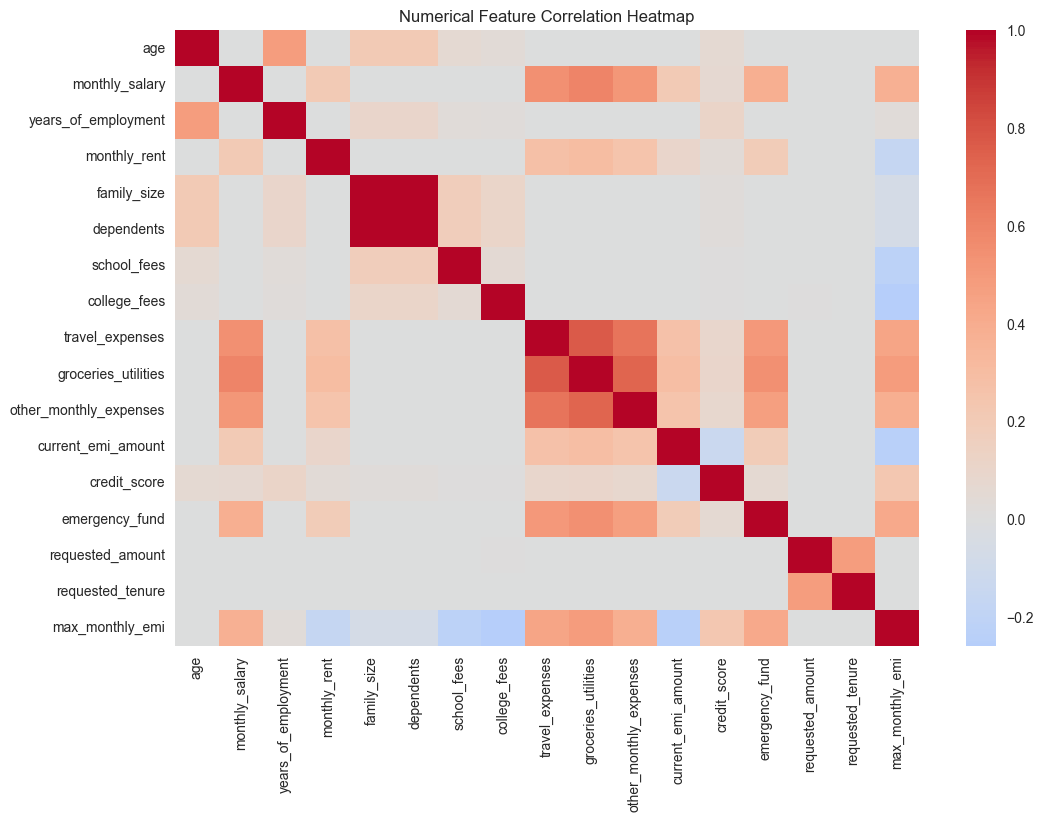

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,8))
sns.heatmap(
    df[num_cols].corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Numerical Feature Correlation Heatmap")
plt.show()


In [ ]:
df.to_csv("emi_eda_ready.csv", index=False)
